## *Laboratorio 2, parte 3*
Daniel Behar, Cruz del Cid

## Liberias

In [15]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.color import rgb2gray

## 1. PCA con imágenes

In [16]:
I = plt.imread('tikal.jpg')
I.shape

(540, 500, 3)

In [17]:
Igray = rgb2gray(I)
Igray.shape

(540, 500)

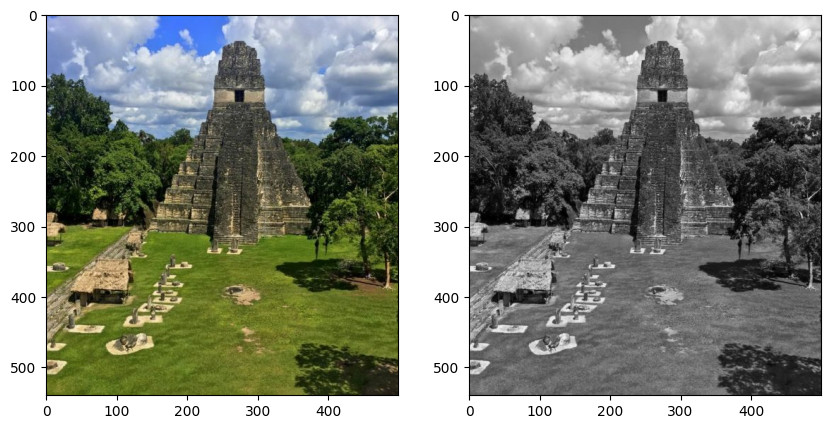

In [18]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(I)
plt.subplot(1,2,2)
plt.imshow(Igray, cmap=plt.cm.gray)
plt.show()

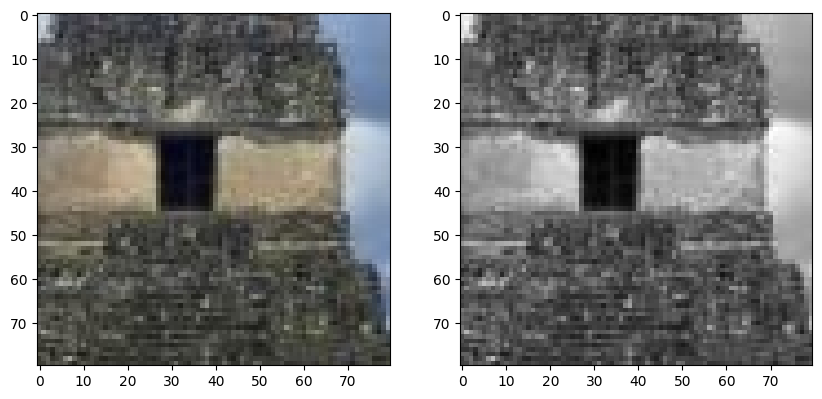

In [19]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(I[80:160, 240:320, :])
plt.subplot(1,2,2)
plt.imshow(Igray[80:160, 240:320], cmap=plt.cm.gray)
plt.show()

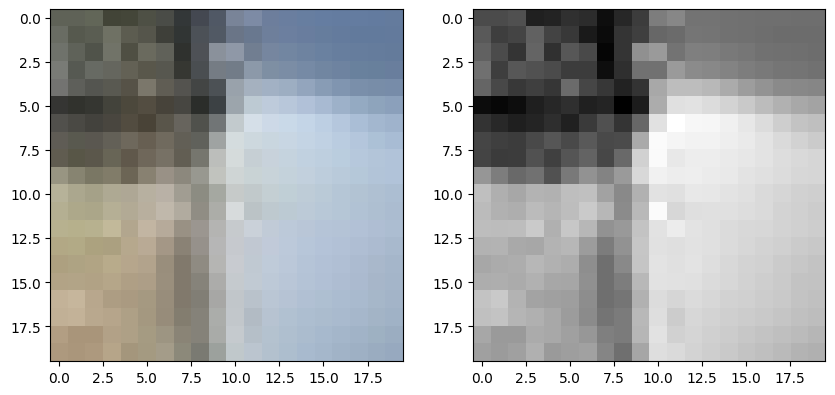

In [20]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(I[100:120, 300:320, :])
plt.subplot(1,2,2)
plt.imshow(Igray[100:120, 300:320], cmap=plt.cm.gray)
plt.show()

In [21]:
print((255*Igray[80:98, 300:318]).astype(np.uint8))

[[ 80  89  98 117 166 159 168 160 167 163 170 158 158 155 151 150 150 151]
 [ 95  87 104 114 168 164 166 160 161 163 167 159 157 154 150 148 148 149]
 [ 83  69  85  76 158 163 162 164 157 160 156 154 154 151 148 147 146 147]
 [ 96 106 112 102 141 159 163 172 161 165 154 158 152 150 147 146 145 145]
 [100  99  73  88 130 153 156 164 157 160 148 157 151 149 147 146 145 145]
 [117 105  81 137 145 160 155 153 156 156 147 155 151 149 146 145 144 144]
 [ 82  76  74 126 135 141 134 131 158 161 155 159 150 148 146 145 143 143]
 [ 48  57  67  80  71  76  77  84 137 148 147 146 148 147 145 144 142 142]
 [ 73  60  73  79  67  96 139  82 149 141 138 150 144 142 140 140 138 137]
 [ 72  63  63  67  55  75  88  71 129 136 141 144 143 141 139 137 136 135]
 [ 70  71  60  72  74  80  64  81 118 140 146 137 142 140 138 136 134 133]
 [ 75  70  56  79  96  89  78  89 105 140 149 136 143 141 139 137 135 133]
 [ 61  79  79  97  85  72  89  68  73 122 142 140 144 142 140 138 136 134]
 [ 99  97  85  90  74  62

In [22]:
def image2vectorblocks(I, block_size):
    '''
    Función que convierte una imagen en escala de grises a un stack de bloques vectorizados.
    Inputs:   I = imagen grayscale de tamaño o shape (h, w).
              block_size = entero, que representa el tamaño de los bloques cuadrados,
                           se trabajarán bloques de tamaño o shape (block_size, block_size).
    Outputs:  stack = stack de bloques, el formato del stack es un numpy array de tamaño (N, b),
                      donde N es el número de bloques resultantes y b = block_size * block_size.
    '''
    (h, w) = I.shape[:2]
    stack = []
    
    for i in range(0, h//block_size):
        for j in range(0, w//block_size):
            block = I[block_size*i:block_size*(i+1), block_size*j:block_size*(j+1)].ravel()
            stack.append(block)
    stack = np.array(stack)
    return stack

In [23]:
def vectorblocks2image(stack, Ishape, block_size):
    '''
    Función que convierte una stack de bloques vectorizados a una imagen en escala de grises.
    Inputs:   stack  = stack de bloques, el formato del stack es un numpy array de tamaño (N, b),
                       donde N es el número de bloques resultantes y b = block_size * block_size.
              Ishape = tamaño de la imagen esperada de salida (h, w).
              block_size = entero, que representa el tamaño de los bloques cuadrados,
                           en el stack (block_size, block_size).
    Outputs:  J = imagen reconstruida en escala de grises, como numpy array de tamaño (h, w).
    '''

    (h, w) = Ishape
    J = np.zeros((h, w))
    
    for i in range(0, stack.shape[0]):
        r = i * block_size // w
        c = i - r*(w // block_size)
        block = stack[i,:].reshape(block_size, block_size)
        J[block_size*r:block_size*r+block_size, block_size*c:block_size*c+block_size] = block
    return J

In [24]:
sh = 20
stack = image2vectorblocks(Igray, sh)
stack.shape

(675, 400)

In [25]:
# Centramos los datos
mu = stack.mean(axis=0)
std = stack.std(axis=0)

Xc = (stack - mu) / std

In [26]:
U, S, V = np.linalg.svd(Xc)
print(U.shape, S.shape, V.shape)

(675, 675) (400,) (400, 400)


In [27]:
S = np.diag(S)
S.shape

(400, 400)

In [28]:
# probando con los siguientes números de componentes principales
ks = [1,2,3,4,5,10,15,20,30,40,50,60,70,80,90,100]

Ishape = Igray.shape[:2]
approx = []

for k in ks:
    appk = U[:,:k] @ S[:k,:k] @ V[:k,:] 
    J = vectorblocks2image(appk, Ishape, sh)
    approx.append(J)

In [29]:
J = vectorblocks2image(stack, Ishape, sh)
J.shape

(540, 500)

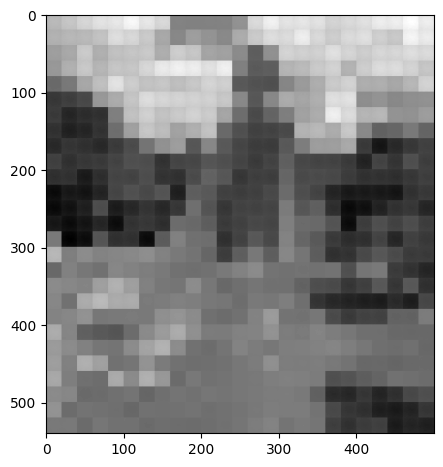

In [30]:
plt.figure(figsize=(5,5.5))
plt.imshow(approx[0], cmap='gray')
plt.show()

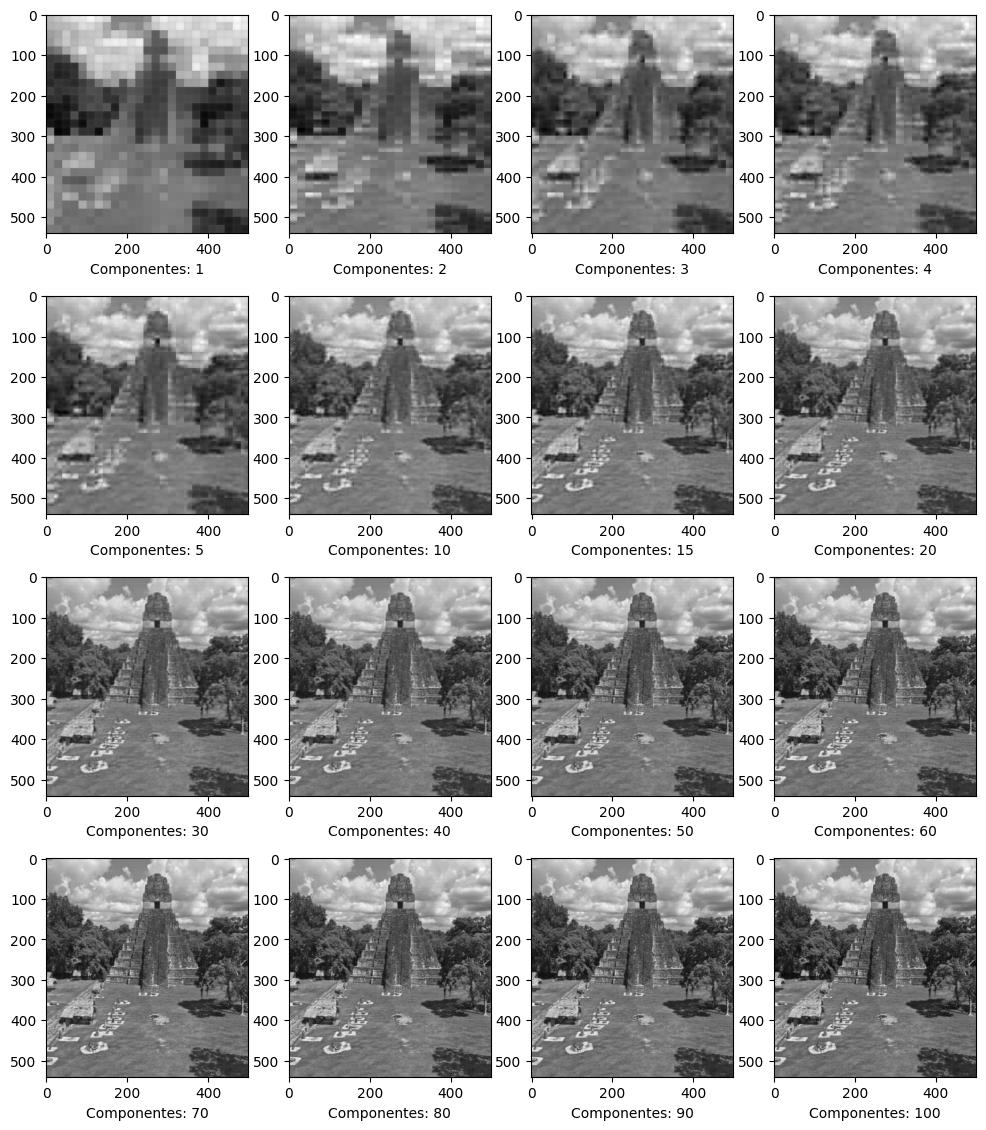

In [31]:
plt.figure(figsize=(12,14))
for i in range(0, 4):
    for j in range(0, 4):
        plt.subplot(4,4,4*i+j+1)
        plt.imshow(approx[4*i+j], cmap='gray')
        plt.xlabel('Componentes: {}'.format(ks[4*i+j]))
plt.show()

### Cálculo del Error

In [32]:
Cov = (Xc.T) @ Xc

In [33]:
eigs, _ = np.linalg.eig(Cov)

In [34]:
explained_variance = eigs / eigs.sum()

In [35]:
np.round(explained_variance[:20], 4)

array([0.738 , 0.0585, 0.0313, 0.0158, 0.0142, 0.01  , 0.009 , 0.0073,
       0.0063, 0.0052, 0.0049, 0.0044, 0.004 , 0.0035, 0.0032, 0.003 ,
       0.0027, 0.0026, 0.0025, 0.0022])

In [36]:
explained_accumulative = explained_variance.cumsum()

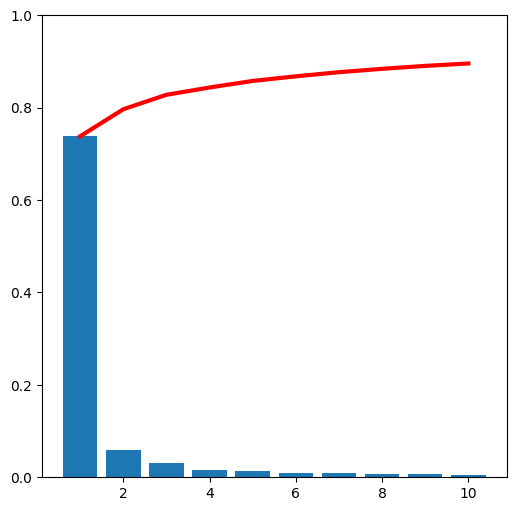

In [37]:
k = 10
plt.figure(figsize=(6,6))
plt.bar(np.arange(1,1+k), explained_variance[:k])
plt.plot(np.arange(1,1+k), explained_accumulative[:k], 'r-', lw=3)
plt.ylim([0,1])
plt.show()